# 22-07-2020 Exam: Classification

1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots (2pt)

2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values (2pt)

3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any (4pt)

4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure (4pt)

5. Show the performance measures and the confusion matrices for the best hyperparameters of each model (2pt)

6. Comment the results (2pt)

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = 'ML-Python-Lab-Data.csv'
random_state = 42
train_size = 0.7

## 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots (2pt)



In [54]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
names = ['Index', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv(url, index_col=0, names=names)
df['Sex'] = encoder.fit_transform(df['Sex'].values.reshape(-1,1))

print('Size: {}\tshape: {}'.format(df.size, df.shape))
df.head()

Size: 37593	shape: (4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,,
0,2.0,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,2.0,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,0.0,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,2.0,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,1.0,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          3997 non-null   float64
 2   Diameter        3976 non-null   float64
 3   Height          3987 non-null   float64
 4   Whole weight    3990 non-null   float64
 5   Shucked weight  3983 non-null   float64
 6   Viscera weight  4002 non-null   float64
 7   Shell weight    3990 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(9)
memory usage: 326.3 KB


In [56]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,1.052909,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.822240,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,2.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


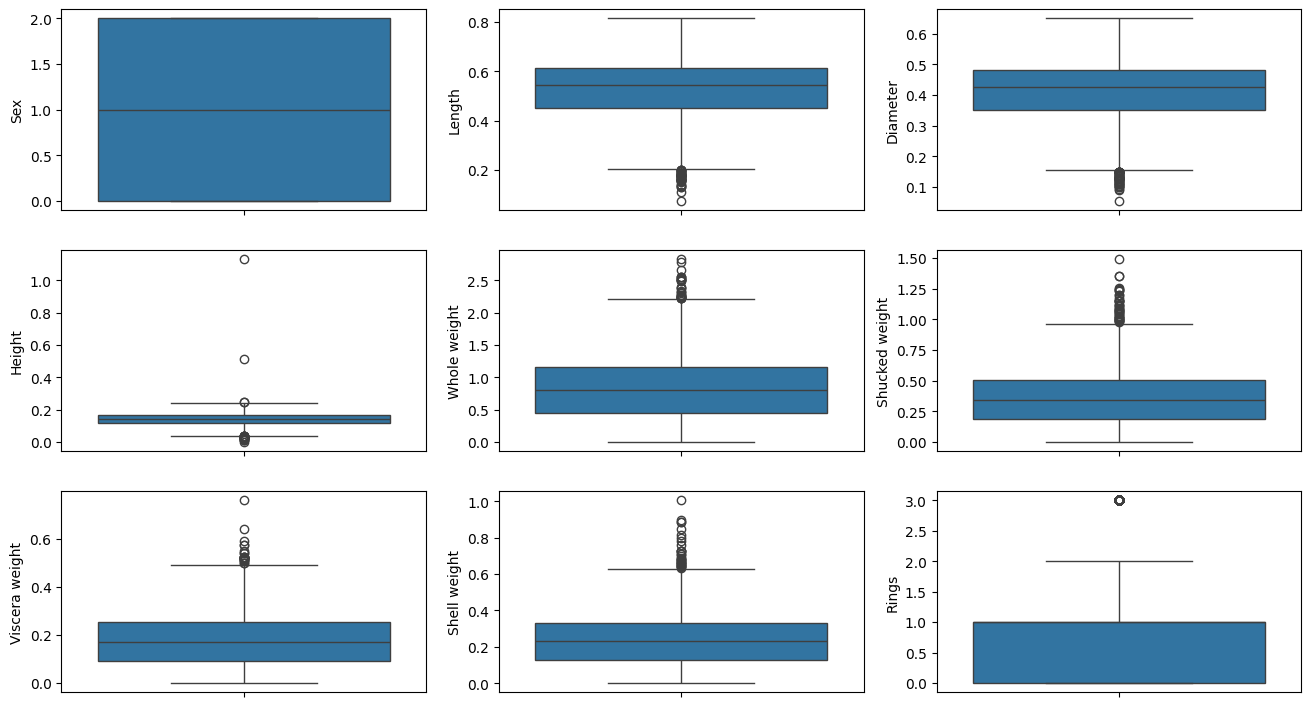

In [57]:
fig = plt.figure(figsize=(16,12))
pos = 1
for i in df.columns:
    plt.subplot(4, 3, pos)
    sns.boxplot(df[i])
    pos+=1

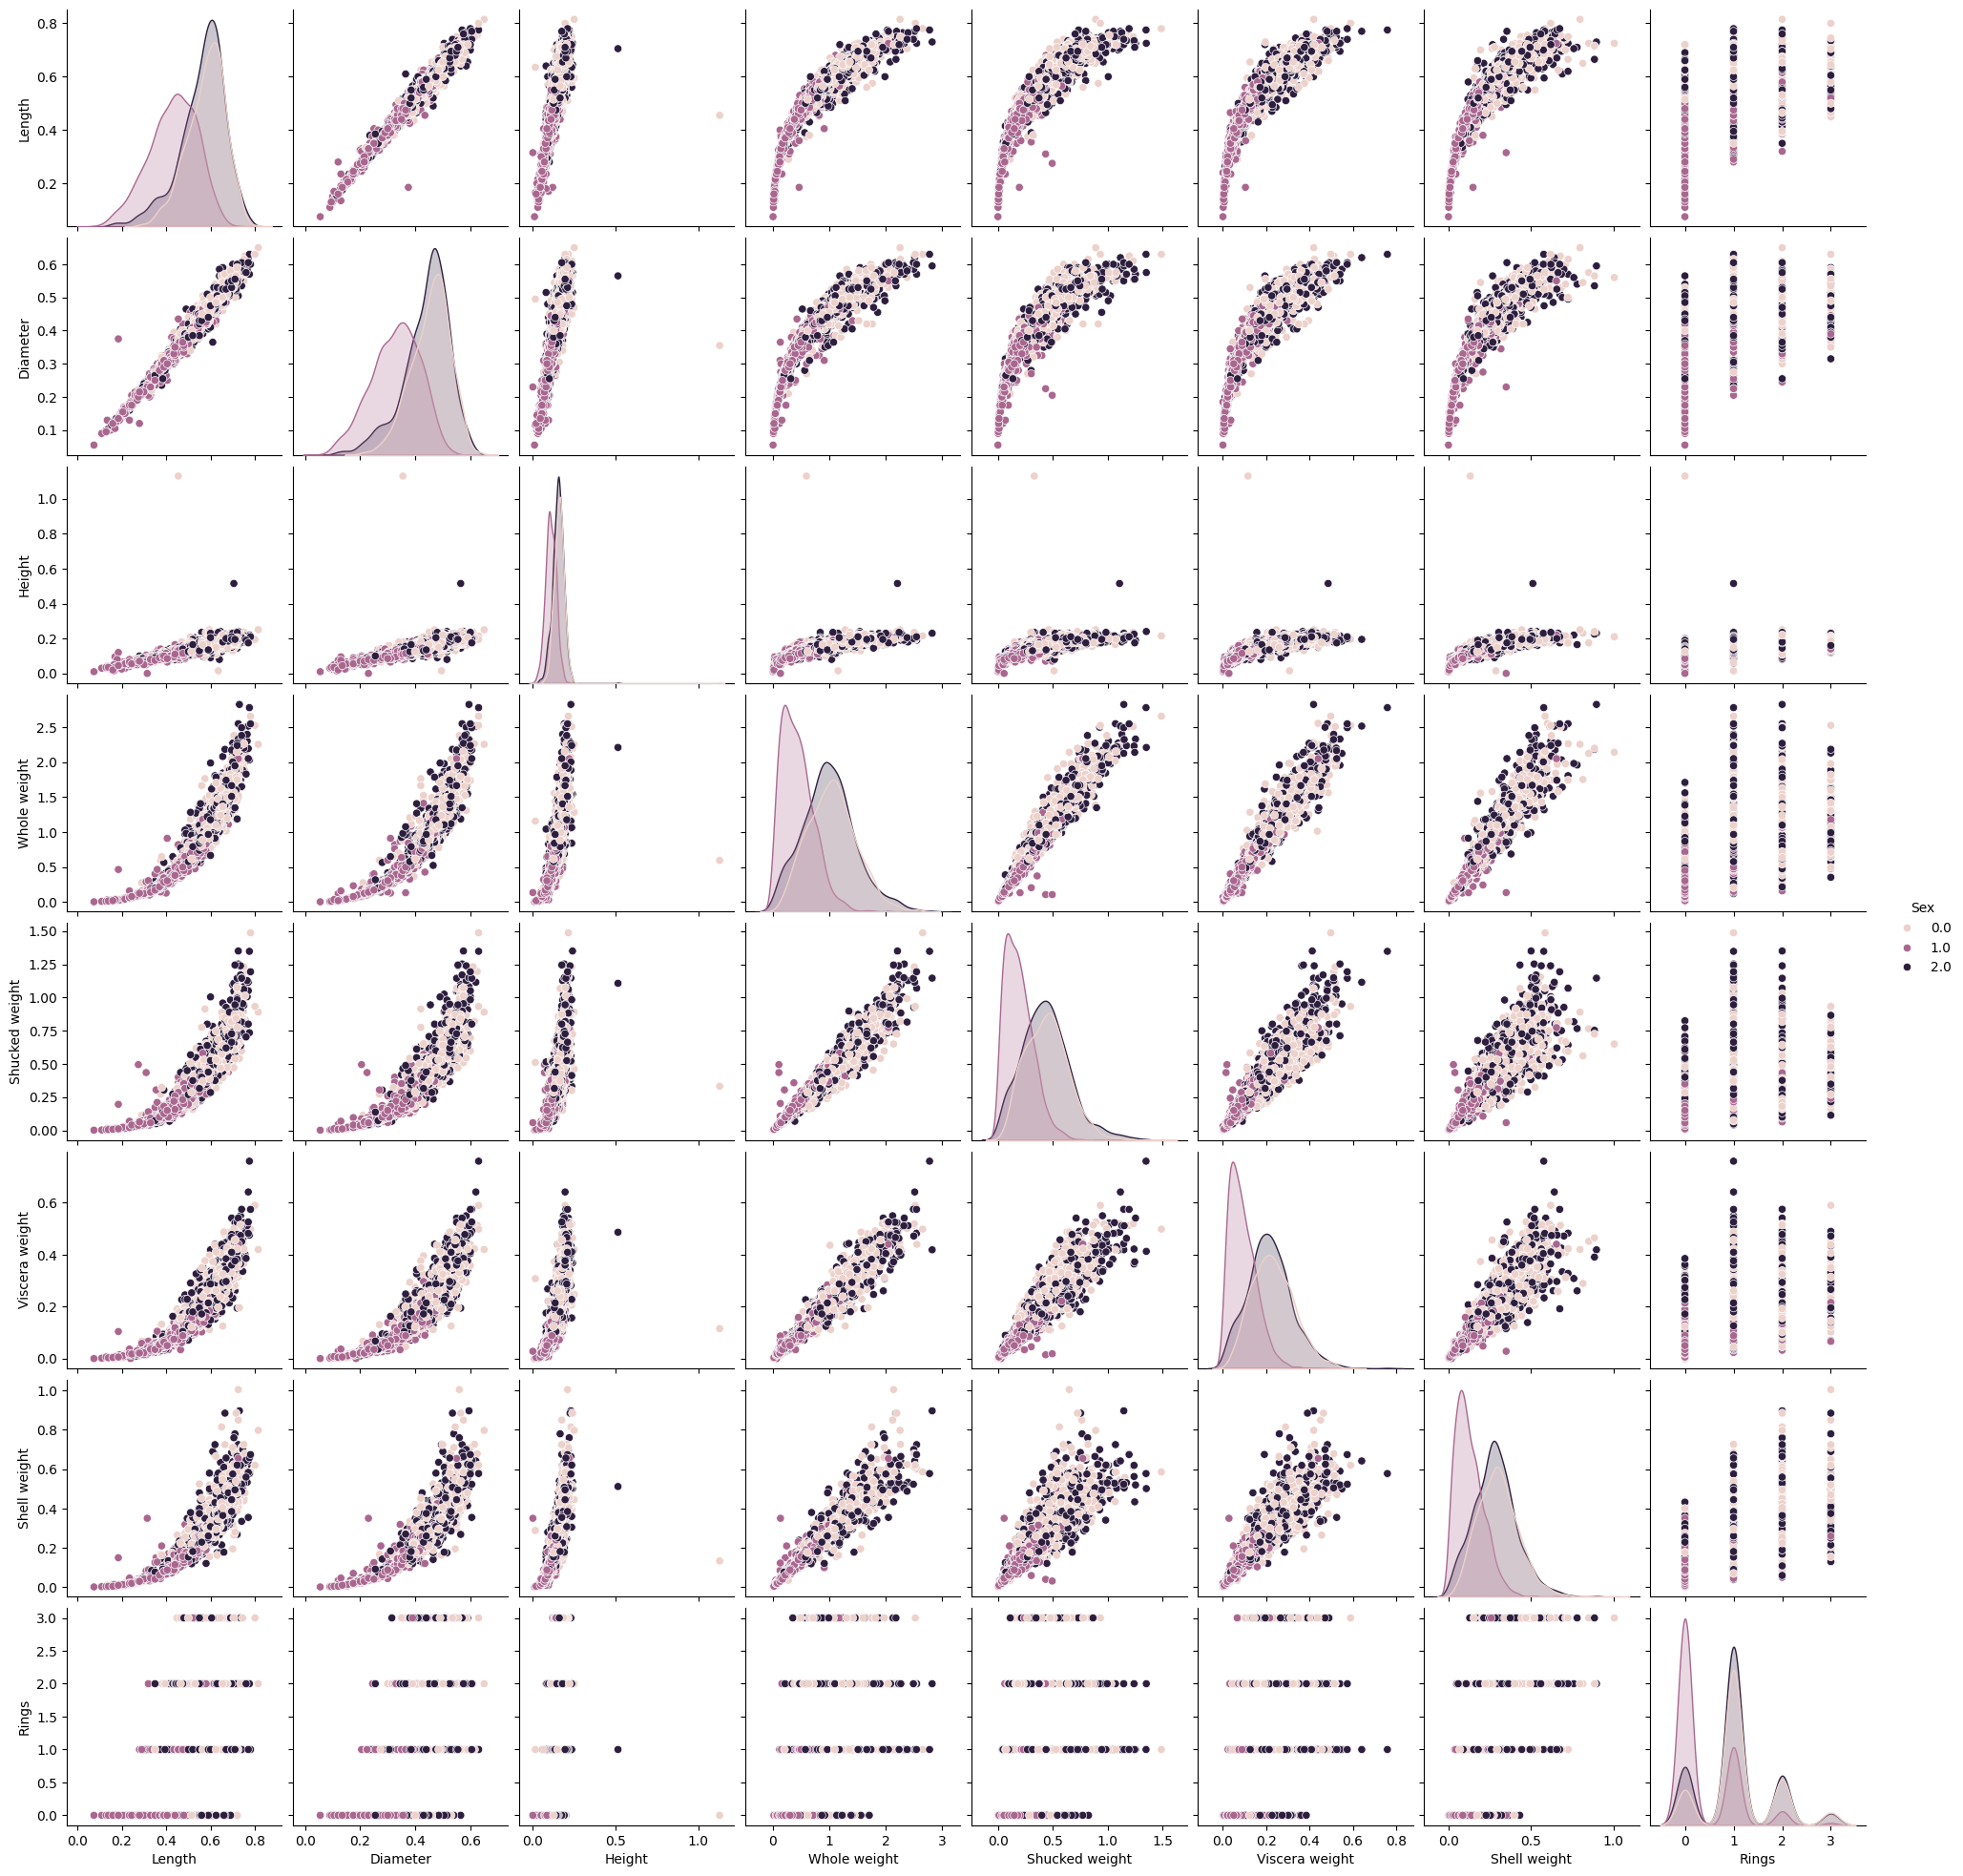

In [58]:
sns.pairplot(df, hue='Sex')

## 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values (2pt)



Distributions seem normal. There is quite a large amount of outliers, especially in Length, Diameter, Whole weight, shell weight.

<Axes: >

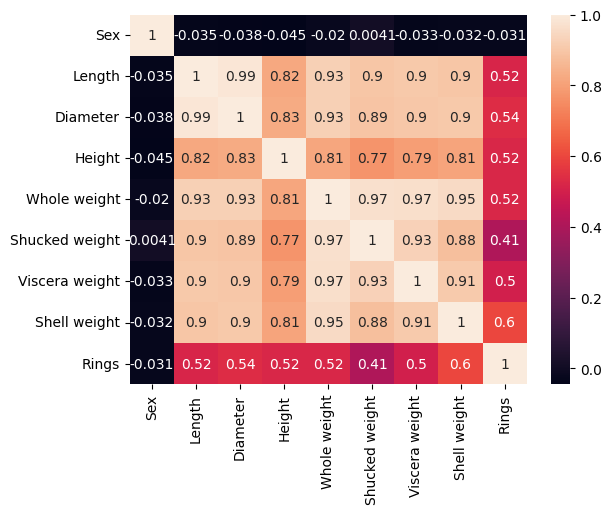

In [59]:
plt.figsize=(12,12)
sns.heatmap(df.corr(), annot=True)

Correlation is high between Length and Diameter (almost 1), and is also pretty high between Whole weight and other weights.
Correlation between Sex and any other parameter is on the other hand negligeble.

## 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any (4pt)



Will be removing Sex column, since it has no correlation with any other parameter

In [60]:
df.drop(columns=['Sex'], inplace=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.0700,0.0
2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.2100,1.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,NaN,1.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0


In [62]:
print('Removing {} rows with missing values..'.format(df.shape[0] - df.dropna().copy().shape[0]))
df.dropna(inplace=True)
print('New shape is', df.shape)

Removing 1125 rows with missing values
New shape is (3052, 8)


## 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure (4pt)


In [65]:
from sklearn.model_selection import train_test_split

target = 'Rings'
X = df.drop(target, axis=1)
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)
print('Trainning and testing set have respectively {} and {} elements'.format(Xtrain.shape[0], Xtest.shape[0]))


Trainning and testing set have respectively 2136 and 916 elements


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
prev_dt_depth = dt.tree_.max_depth
print('Preveous Decision Tree max_depth: {}\n'.format(prev_dt_depth))

model_libs = ['dt', 'knn', 'pt']

models = {
    'dt' : {
        'name' : 'Decision Tree'
        , 'estimator' : DecisionTreeClassifier()
        , 'params' : [{'max_depth' : list(np.arange(1, prev_dt_depth)), 'random_state' : [random_state]}]
    }, 
    'knn' : {
        'name' : 'K-Nearest Neighbors'
        , 'estimator' : KNeighborsClassifier()
        , 'params' : [{'n_neighbors' : list(np.arange(2, 20))}]
    }, 
    'pt' : {
        'name' : 'Perceptron'
        , 'estimator' : Perceptron()
        , 'params' : [{'random_state' : [random_state]}]
    }, 
}

Preveous Decision Tree max_depth: 21



In [87]:
predictions = {}
for m in model_libs:
    print('-'*40)
    print('Tuning {}..'.format(models[m]['name']))
    gs = GridSearchCV(estimator=models[m]['estimator']
                      , param_grid=models[m]['params']
                      , refit=True
                      , scoring='f1_macro')
    gs.fit(Xtrain, ytrain)
    y_gs = gs.predict(Xtest)
    predictions[m] = y_gs
    print('Best params: {}'.format(gs.best_params_))

----------------------------------------
Tuning Decision Tree..
Best params: {'max_depth': 9, 'random_state': 42}
----------------------------------------
Tuning K-Nearest Neighbors..
Best params: {'n_neighbors': 9}
----------------------------------------
Tuning Perceptron..
Best params: {'random_state': 42}


## 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model (2pt)



----------------------------------------
Decision Tree -> accuracy score: 61.57%
----------------------------------------
K-Nearest Neighbors -> accuracy score: 65.07%
----------------------------------------
Perceptron -> accuracy score: 62.34%


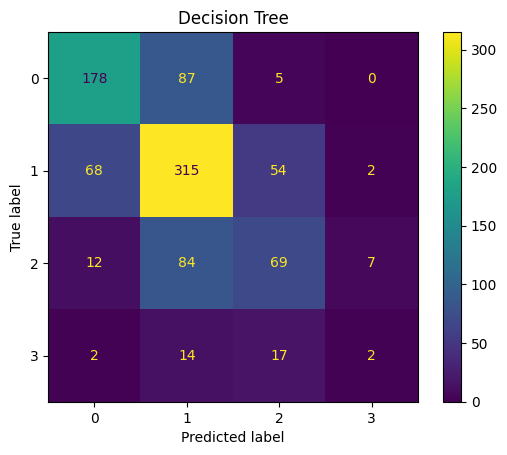

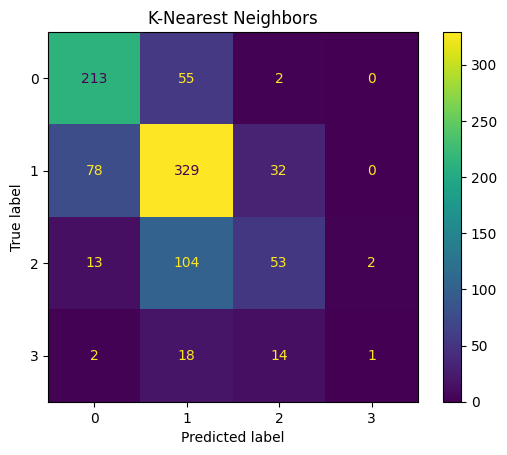

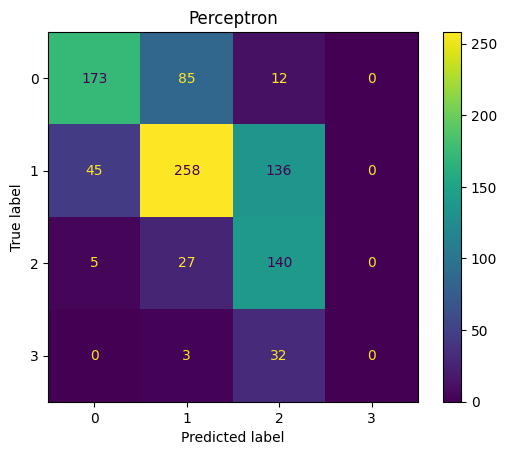

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
for m in model_libs:
    print('-'*40)
    print('{} -> accuracy score: {:.2f}%'.format(models[m]['name'], accuracy_score(ytest, predictions[m]) * 100))
    cm = confusion_matrix(ytest, predictions[m])
    CMD = ConfusionMatrixDisplay(cm).plot()
    CMD.ax_.set_title(models[m]['name'])

## 6. Comment the results (2pt)

Accuracy score is quite low, but the best model seems to be K-Nearest Neighbors